<h1><center>Una aplicación de la descomposición en valores singulares: Inversa de Moore-Penrose</center></h1>
<h2><center> Álgebra Matricial </center></h2>
<h3><center> Viridiana Itzel Méndez Vásquez </center></h3>

La resolución de sistemas de ecuaciones lineales han jugado siempre un papel muy importante en la solución de problemas en muchos ámbitos y como es bien sabido, estos pueden no tener solución o tener, pero no necesariamente ser única. En forma matricial $Ax=b$ sería un sistema de ecuaciones y la forma fácil de resolverlo sería $x = A^{-1}b$, pero no sabemos más de $A$, esta no necesariamente es una matriz cuadrada o si lo es, no se nos garantiza que exista su inversa. Para este tipo de problemas y más se desarolló la **inversa de Moore-Penrose**. Sin embargo, para llegar a ese punto es importante reconocer la importancia de la diagonalización y factorización de matrices en Álgebra matricial, se sabe que existe una basta teoría sobre ello cuando hablamos de matrices simétricas, pero ¿qué sucede cuando no lo son? Porque evidentemente no todas las matrices cumplen con esa propiedad, y si hablamos sobre matrices de datos con grandes dimensiones la situación se complica, además a partir de estos temas llegamos a la **descomposición en valores singulares** que es la base para encontrar la **inversa de Moore-Penrose**.

# Diagonalización ortogonal en matrices simétricas

Empecemos hablando sobre diagonalizació. Una matriz $A$ es simétrica si satisface $A^{T}=A$. Claramente estamos hablando de matrices cuadradas. 

Vamos a decir que una matriz es **diagonalizable ortogonalmente** si existe una matriz ortogonal $P$ y una matriz diagonal $D$ tal que
$$A = P D P^{T}$$
Sin embargo, necesitamos encontrar $n$ vectores propios linealmente independientes y ortonormales para construir la matriz $P$, pero como lo mencioné, existe mucha teoría sobre matrices simétricas y tenemos el siguiente Teorema

**Teorema**. Una matriz $A_{n \times n}$ es diagonalizable ortogonalmente si y sólo si $A$ es simétrica.

Pero, ¿cómo construimos dichas matrices? Resulta que si $A$ es una matriz simétrica, entonces cualesquiera dos vectores propios de diferentes espacios propios son ortogonales. De modo que se van a presentar dos casos:
1. $A$ tiene valores propios sin multiplicidades.
Para este caso, gracias al teorema podemos construir a $P$ como sigue
$$ P = [ v_{1}, \ldots, v_{n}]$$
donde cada $v_{i} = \frac{1}{||u_{i}||} u_{i}$ para $i=1, \ldots, n$ con $u_{i}$ el vector propio correspondiente al valor propio $\lambda_{i}$.

Mientras que $D= diag[\lambda_{1}, \ldots, \lambda_{n}]$.

2. $A$ tiene valores propios con multiplicidades.

En este caso, los vectores propios correspondientes a los valores propios con multiplicidad no van a ser ortogonales, por lo que es necesario construirlos, esto lo vamos a lograr gracias al Proceso de Gram-Schmidt, dicho proceso se define de la siguiente forma:

## Proceso de Gram-Schmidt

A partir de una base $\{x_{1}, \ldots, x_{p} \}$ para un subespacio $W$ de $\mathbb{R}^{n}$, se define
$$v_{1} = x_{1} $$
$$v_{2} = x_{2} - \frac{x_{2} \cdot v_{1}}{ v_{1} \cdot v_{1}} v_{1}$$
$$v_{3} = x_{3}-\frac{x_{3} \cdot v_{1}}{ v_{1} \cdot v_{1}} v_{1}-\frac{x_{3} \cdot v_{2}}{ v_{2} \cdot v_{2}} v_{2} $$
$$\vdots$$
$$v_{p} = x_{p}-\frac{x_{p} \cdot v_{1}}{ v_{1} \cdot v_{1}} v_{1}-\frac{x_{p} \cdot v_{2}}{ v_{2} \cdot v_{2}} v_{2} - \cdots - \frac{x_{p} \cdot v_{p-1}}{ v_{p-1} \cdot v_{p-1}} v_{p-1} $$
Entonces $\{v_{1}, \ldots, v_{p} \}$ es una base ortonormal para $W$.

Dicho procedimiento lo implemento en Python de la siguiente manera:

In [148]:
import numpy as np

def gramSchmidt(A):
    (n,m) = A.shape
    for i in range(m):
        vi = A[:,i]
        for j in range(i):
            vi = vi- np.dot(A[:,j],A[:,i])*A[:,j]
        A[:, i] = vi / np.sqrt(np.dot(vi,vi))

Con el método ya programado obtengamos la matriz $P$ y $D$ para la siguiente matriz simétrica
$$ A = \pmatrix{6 & -2 & -1 \\ -2 & 6 & -1 \\ -1 & -1 & 5}$$
El primer paso es obtener los valores y vectores propios: Esto lo hacemos mediante la librería **Numpy**, obtenemos los valores propios y la matriz con los vectores propios normalizados correspondientes.

In [179]:
A = np.array([[6.0, -2.0,-1.0],[-2.0,6.0,-1.0],[-1.0,-1.0,5.0]])
x, V = np.linalg.eig(A)
x

array([3., 8., 6.])

En este caso observamos que los valores propios no tienen multiplicidad, de modo que para este caso
$ P = V$ y $D = diag[3,8,6]$.

In [180]:
D = np.diag(x)
np.dot(np.dot(V,D), np.transpose(V))

array([[ 6., -2., -1.],
       [-2.,  6., -1.],
       [-1., -1.,  5.]])

Se comprueba que al realizar el producto $P D P^{T}$ se obtiene la matriz $A$ dada.

Analicemos otro ejemplo, consideramos la matriz
$$ A = \pmatrix{3 & -2 & 4 \\ -2 & 6 & 2 \\ 4 & 2 & 3}$$.

En la siguiente línea se observa que $A$ tiene como valores propios -2 y 7 con multiplicidad 2. Razón por la cual los vectores propios correspondientes al valor propio 7 no son ortogonales.

In [218]:
A = np.array([[3.0, -2.0,4.0],[-2.0,6.0,2.0],[4.0,2.0,3.0]])
x, V = np.linalg.eig(A)
x

array([ 7., -2.,  7.])

Seleccionamos los vectores propios correspondientes a 7 y le aplicamos el proceso de Gram-Schmidt.

In [219]:
NewV = V[:,[0,2]]
NewV

array([[ 0.74535599, -0.08265645],
       [-0.2981424 ,  0.92197303],
       [ 0.59628479,  0.37833006]])

In [220]:
gramSchmidt(NewV)

Finalmente construimos la matriz $P$ respetando el orden de los valores propios que devolvió la función.

In [221]:
P = np.zeros((3,3))
P[:,[0,2]] = NewV
P[:,1] = V[:,1]

In [222]:
P

array([[ 7.45355992e-01, -6.66666667e-01, -5.58556635e-17],
       [-2.98142397e-01, -3.33333333e-01,  8.94427191e-01],
       [ 5.96284794e-01,  6.66666667e-01,  4.47213595e-01]])

Construimos $D$, realizamos la multiplicación $P A P^{T}$ y comprobamos que efectivamente se obtiene la matriz $A$.

In [223]:
D = np.diag(x)
np.dot(np.dot(P,D), np.transpose(P))

array([[ 3., -2.,  4.],
       [-2.,  6.,  2.],
       [ 4.,  2.,  3.]])

# Descomposición en valores singulares (SVD)

Vimos que es relativamente fácil diagonalizar y, por lo tanto, factorizar algunas matrices con ciertas características: Matrices simétricas, desafortunadamente hay un sin fin de matrices que no cumplen con dicha propiedad, no es posible una factorización $P D P^{-1}$, pero sí podemos factorizar $A= QDP^{-1}$ donde $A_{m \times n}$, a este tipo de factorización se le conoce como *descomposición en valores singulares*, pero ¿qué son los valores singulares de una matriz?

Consideremos una matriz $A$ de $m \times n$, no tenemos mayor información sobre $A$, pero sí sabemos que $A^{T}A$ es simétrica y por lo tanto, se puede diagonalizar ortogonalmente. Sea $\{ v_{1}, \ldots, v_{n} \}$ vectores propios de $A^{T}A$ que forman una base ortonormal para $\mathbb{R}^{n}$ correspondientes a los valores propios $\lambda_{1}, \ldots, \lambda_{n}$ asociados a $A^{T}A$. Se cumple que para $i = 1, \ldots, n$, 
$$ ||Av_{i} ||^{2} = \lambda_{i} \geq 0 $$ 
Se pueden ordenar los valores propios de modo que
$$ \lambda_{1} \geq \lambda_{2} \geq \cdots \geq \lambda_{n} \geq 0$$

Los **valores singulares** de $A$ se denotan por $\sigma_{1}, \ldots, \sigma_{n}$ y se definen como 
$$ \sigma_{i} = \sqrt{ \lambda_{i}}, \qquad \text{ para } i =1, \ldots, n.$$

Con las condiciones mencionadas anteriormente y suponiendo que $A$ tienen $r$ valores singulares, se garantiza que $\{ Av_{1}, \ldots, Av_{n} \}$ es una base ortogonal para $ColA$ y $rango A = r$.

Dicho esto, se presenta la descomposición en valores singulares.

Sea $A$ una matriz de $m \times n$ con rango $r$. Entonces existe una matriz $\Sigma$ de $m \times n$ de la forma
$$ \Sigma = \begin{pmatrix} 
            D & 0 \\ 0 & 0 
            \end{pmatrix}$$
donde $D$ es una matriz diagonal de $r \times r$ cuyas entradas son los primeros $r$ valores singulares de $A$, $\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{r} > 0$, y existen una matriz ortogonal $U$ de $m \times m$ y una matriz ortogonal $V$ de $n \times n$ tales que
$$ A = U \Sigma V^{T} $$.

Cuando $\Sigma$ contiene filas o columnas de ceros, es posible obtener un factorización más compacta de $A$. Siguiendo con las consideraciones antes mencionadas, las matrices $U$ y $V$ se pueden escribir en bloques de la siguiente forma 
$$ U = [U_{r} U_{m-r}], \qquad \text{ donde } U_{r} = [u_{1} \cdots u_{r}]$$
$$ V = [V_{r} V_{n-r} ], \qquad \text{ donde } V_{r} = [v_{1} \cdots v_{r}]$$
de modo que $U_{r}$ es de $m \times r$, y $V_{r}$ es de $n \times r$ y así

$$ A = U \Sigma V^{T} = (U_{r} U_{m-r}) \begin{pmatrix} 
            D & 0 \\ 0 & 0 
            \end{pmatrix} \begin{pmatrix} 
            V_{r}^{T} \\ V_{n-r}^{T}
            \end{pmatrix} = U_{r} D V_{r}^{T} $$
A la descomposición anterior se le conoce como **descomposición en valores singulares reducida** de $A$. De aquí es donde se deriva la **seudoinversa** o **inversa de Moore-Penrose**, pues como $D$ tiene entradas diferentes de cero, entonces es invertible y así
$$A^{+} = V_{r} D^{-1} U_{r}^{T}$$.

Consideremos la matriz
$$ A = \begin{pmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{pmatrix} $$
encontremos su descomposición en valores singulares y su inversa de Moore-Penrose. Primero definimos la matriz:

In [224]:
A = np.array([[7,2],[3,4],[5,3]])

En Python podemos obtener la SVD usando la librería Numpy de la siguiente forma:

In [246]:
import numpy as np

U, D, Vt = np.linalg.svd(A)

In [247]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [249]:
D

array([10.25142677,  2.62835484])

Observamos que la matriz $D$ contiene a los valores singulares, en este caso son 2, de modo que la matriz reducida $U_{r}$ debe tener dimensión $3 \times 2$, así

In [248]:
U_red = U[:,0:2]
U_red

array([[-0.69366543,  0.59343205],
       [-0.4427092 , -0.79833696],
       [-0.56818732, -0.10245245]])

In [250]:
Vt

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

Para encontrar la seudoinversa de $A$ de la forma definida anteriormente, necesitamos conocer la inversa de $D$, la obtenemos de la siguiente forma

In [251]:
D_inv = np.linalg.inv(np.diag(D))
D_inv

array([[0.0975474 , 0.        ],
       [0.        , 0.38046613]])

Finalmente, encontramos $A^{+}$ según su definición, es decir $A^{+} = V_{r} D^{-1} U_{r}^{T}$ como sigue

In [253]:
A_plus = np.dot(np.dot(Vt.T,D_inv),U_red.T)
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

Todo este proceso lo hicimos manualmente, pero Python lo puede obtener directamente con la siguiente línea

In [255]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

Observamos que obtenemos el mismo resultado. Bueno, pero ¿para qué nos sirve dicha inversa? Como mencionaba, en muchos casos no es posible encontrar la inversa de una matriz y si queremos resolver el sistema $Ax=b$ la solución no va a existir, para estos casos es mejor encontrar una aproximación $Ax$ a $b$, pues si se define
$$ \hat{x} = A^{+} b = V_{r} D^{-1} U_{r}^{T} b$$
entonces,
\begin{eqnarray}
A \hat{x} & = & (U_{r} D V_{r}^{T})(V_{r} D^{-1} U_{r}^{T}b) \\
& = & U_{r} D D^{-1} U_{r}^{T}b \\
& = & U_{r} U_{r}^{T}b
\end{eqnarray}
donde $U_{r} U_{r}^{T}b$ es la proyección ortogonal $\hat{b}$ de $b$ sobre $ColA$. Por lo tanto $\hat{x}$ es una solución por mínimos cuadrados de $Ax=b$.

Veamos un ejemplo, tenemos el conjunto de datos $[ (2,1), (5,2), (7,3), (8,3) ]$ y queremos encontrar la recta por mínimos cuadrados que mejor ajusta a los datos, es decir, se quiere resolver el sistema
\begin{equation}
\begin{pmatrix} 1 & 2 \\ 1 & 5 \\ 1 & 7 \\ 1 & 8 \end{pmatrix} \begin{pmatrix} b \\ m \end{pmatrix} = \begin{pmatrix} 1 \\ 2 \\ 3 \\ 3 \end{pmatrix}
\end{equation}

Definamos la matriz y encontremos su inversa de Moore-Penrose para aproximar la solución:

In [258]:
A = np.array([[1,2], [1,5], [1,7], [1,8]])
A_plus = np.linalg.pinv(A)

Como $\hat{x} = A^{+}b$, entonces  

In [261]:
b = np.array([1,2,3,3]).T
x = np.dot(A_plus,b)
x

array([0.28571429, 0.35714286])

Graficando los datos y la recta obtenida

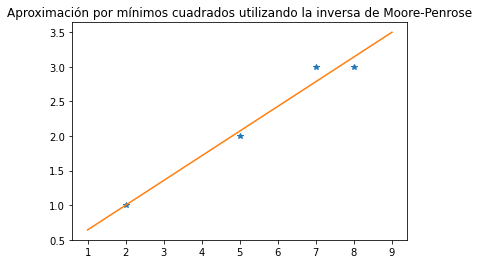

In [266]:
import matplotlib.pyplot as plt

y = np.linspace(1, 9, 1000)
recta = x[0]+x[1]*y
plt.plot(A[:,1], b, "*")
plt.plot(y,recta)
plt.title("Aproximación por mínimos cuadrados utilizando la inversa de Moore-Penrose")
plt.show()

# Conclusiones

La descomposición de valores singulares tiene una fuerte base teórica detrás como es la diagonalización ortogonal, valores y vectores propios, formas cuadráticas, entre otros temas que ayudan a llegar a ese punto, sin embargo, en la práctica es preferibles evitar trabajar con $A^{T}A$ pues si la matriz $A$ presenta errores en sus entradas, estos se elevan al cuadrado al obtener $A^{T}A$, por lo tanto, de forma numérica se trabaja con algoritmos iterativos para obtener los valores singulares y vectores singulares de $A$. 

Se mostró una aplicación de la SVD, la inversa de Moore-Penrose que se se puede utilizar, entre muchas cosas, a aproximar datos mediante mínimos cuadrados de una manera sencilla y es de forma sencilla porque ya tenemos la certeza de que al utilizar esa matriz se obtiene una aproximación con la mínima donde además $\hat{x}$ definida como antes tiene la longitud más pequeña en comparación con todas las soluciones por mínimos cuadrados de $Ax=b$.

Es interesante la forma como podemos obtener una *inversa* de matrices rectangulares y que además juega un papel importante en la restauración de imágenes, pero no sólo eso, sino que minimiza el trabajo computacional requerido comparado con otros métodos, como se muestra en [Applications of the Moore-Penrose Inverse in Digital Image Restoration](https://www.hindawi.com/journals/mpe/2009/170724/).

# Bibliografía

1. *Lay, D.C.*, Linear Algebra and Its Applications, Addison-Wesley Series.
2. [Documentación Numpy.linalg.sv](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)
3. *Philip E. Gill, Walter Murray y Margaret H. Wright*, Numerical Linear Algebra and Optimization, vol.1 (Redwood City, CA: Addison-Wesley, 1991).